In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

In [2]:
# Loading data
file_path = Path("../Cleaned_Data/2008-2020_tornadoes_EF_cleaned.csv")
tornado_df = pd.read_csv(file_path)
tornado_df

,surr_key,Year,Month,Day,Timestamp,State,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,51193,2008,10,11,2008-10-11 18:33:00,NM,35.1500,-105.9400,0.0000,0.0000,0,0,0,12000.0,NaN,0.02,10
1,51194,2008,10,11,2008-10-11 21:54:00,KS,39.3300,-101.5500,0.0000,0.0000,0,0,0,NaN,NaN,0.25,10
2,51195,2008,10,24,2008-10-24 16:55:00,GA,31.0200,-81.8100,0.0000,0.0000,0,0,0,1000.0,NaN,0.25,25
3,51196,2008,10,6,2008-10-06 13:46:00,AR,34.5800,-94.1500,34.6300,-94.1200,1,0,0,75000.0,NaN,3.41,250
4,51197,2008,10,6,2008-10-06 16:05:00,TX,33.0700,-94.1000,33.0900,-94.0800,0,0,0,75000.0,NaN,1.50,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,67499,2020,9,1,2020-09-01 16:24:00,TN,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
15887,67501,2020,9,3,2020-09-03 15:57:00,MD,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
15888,67502,2020,9,5,2020-09-05 16:17:00,CA,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
15889,67503,2020,9,5,2020-09-05 18:29:00,CA,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [3]:
tornado_df.columns

Index(['surr_key', 'Year', 'Month', 'Day', 'Timestamp', 'State', 'Start_Lat',
       'Start_Lon', 'End_Lat', 'End_Lon', 'EF', 'Injuries', 'Fatalities',
       'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [4]:
# drop na columns
tornado_df = tornado_df.dropna()

## Machine Learning

In [5]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest -- feature importance

This algorithm takes inputs (Injuries EF Length	Width) to predict (Fatalities)

#### 1. Define input data (X) and output data (y)

In [7]:
X = tornado_df.copy()
X = X.drop(['surr_key','Year', 'Month', 'Day', 'Timestamp','State','Start_Lat','Start_Lon','End_Lat', 'End_Lon','Loss','Crop_Loss', 'Fatalities'], axis=1)
X

,EF,Injuries,Length,Width
22,1,0,8.13,200
28,2,2,4.09,150
29,3,4,8.19,100
73,1,0,10.59,500
81,1,0,3.14,250
...,...,...,...,...
15764,0,0,1.26,50
15785,1,1,0.26,50
15786,1,0,2.17,100
15838,0,0,2.58,100


In [8]:
y = tornado_df["Fatalities"].ravel()
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### 2. Splitting into Train and Test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3. Scale the input data (X)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 4. Fitting the Random Forest Model

In [11]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
 # Fitting the model
model = rf_model.fit(X_train_scaled, y_train)

#### 5. Making Predictions Using Random Forest Model

In [13]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int64)

#### 6. Model Evaluation

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,153,2,0,0
Actual 1,4,0,0,0
Actual 2,0,0,0,1
Actual 3,0,0,0,0


Accuracy Score : 0.95625
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       155
           1       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0

    accuracy                           0.96       160
   macro avg       0.24      0.25      0.25       160
weighted avg       0.94      0.96      0.95       160



C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nat\anaconda3\envs\mlenv\li

#### 7. Rank the Importance of Features

In [17]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

In [18]:
# We can sort the features by their importance.
feature_sort = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
feature_sort

[(0.3507089623401452, 'Injuries'),
 (0.25647005483182567, 'Length'),
 (0.2070829829889132, 'EF'),
 (0.185737999839116, 'Width')]

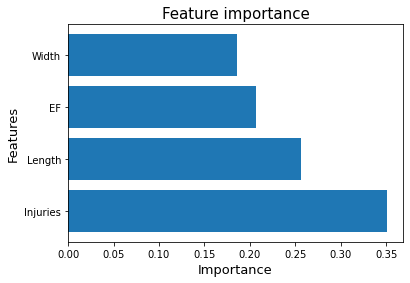

In [19]:
# Plot Feature Importance
features_sorted = []
importance_sorted = []

for i in feature_sort:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Features", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted,)
plt.yticks(range(len(importance_sorted)), features_sorted);